In [21]:
import pandas as pd

def clean_data(df):
    df['pair_id'] = df['country'] + '-' + df['brand']
    # Drop columns: 'ther_area', 'hospital_rate'
    df = df.drop(columns=['ther_area', 'hospital_rate', 'main_channel', 'country', 'brand', 'monthly', 'wd_perc', 'wd'])
    # Drop columns: 'dayweek', 'month' and 8 other columns
    df = df.drop(columns=['n_nwd_bef', 'n_nwd_aft', 'n_weekday_0', 'n_weekday_1', 'n_weekday_2', 'n_weekday_3', 'n_weekday_4', 'wd_left'])
    return df

# Loaded variable 'df' from URI: c:\dev\Bonkis-Jake\data\raw\2023.parquet
df = pd.read_parquet(r'c:\dev\Bonkis-Jake\data\raw\2023.parquet')

df_clean = clean_data(df.copy())



In [30]:
full_date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')

# Create a DataFrame with the full date range
full_date_df = pd.DataFrame({'date': full_date_range})

# Merge the full date range DataFrame with the source DataFrame
merged_df = pd.merge(full_date_df, df[['date', 'dayweek', 'month']].drop_duplicates(), on='date', how='left')

merged_df.to_parquet(r'c:\dev\Bonkis-Jake\data\processed\merged_dates.parquet', index=False)

merged_df.head()

,date,dayweek,month
0,2013-01-01,1.0,1.0
1,2013-01-02,2.0,1.0
2,2013-01-03,3.0,1.0
3,2013-01-04,4.0,1.0
4,2013-01-05,5.0,1.0


In [54]:
import numpy as np
df_pivot = df_clean.pivot_table(index='date', columns='pair_id', values='phase', aggfunc='mean')
df_pivot = df_pivot.reindex(full_date_range, fill_value=np.nan)
print("The shape of the pivot table is:", df_pivot.shape)
# Per ara, faig el missing value imputation més senzill que és senzillament omplir de 0s
# Més endevant caldria afegir masks, per contemplar bé el fet de que alguns producters tenen
# Dates de llençamet al mercat diferents.
df_pivot = df_pivot.fillna(0.0)
df_pivot.to_parquet(r'c:\dev\Bonkis-Jake\data\processed\2023_complete_pivot.parquet')
df_pivot.head()


The shape of the pivot table is: (3287, 2684)


pair_id,Aldovia-AIMST,Aldovia-AITPJ,Aldovia-AIZTT,Aldovia-AMOKR,Aldovia-BELQI,Aldovia-BNCPE,Aldovia-BQSIJ,Aldovia-BRQJC,Aldovia-BUMTY,Aldovia-CCXTL,...,Zamunda-XLTUE,Zamunda-XMLDV,Zamunda-XUJGO,Zamunda-YOWYI,Zamunda-ZAKZS,Zamunda-ZHQFB,Zamunda-ZKKLD,Zamunda-ZKMVW,Zamunda-ZNDRT,Zamunda-ZVLFE
2013-01-01,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2013-01-02,0.006284,0.0,0.020056,0.0,0.0,0.0,0.0,0.0,0.000000,0.003549,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2013-01-03,0.123459,0.0,0.050141,0.0,0.0,0.0,0.0,0.0,0.198866,0.118722,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.005328
2013-01-04,0.055607,0.0,0.030084,0.0,0.0,0.0,0.0,0.0,0.050842,0.106291,...,0.072776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010346,0.068923
2013-01-05,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


Ara faig un plot per veure si ens falta alguna data

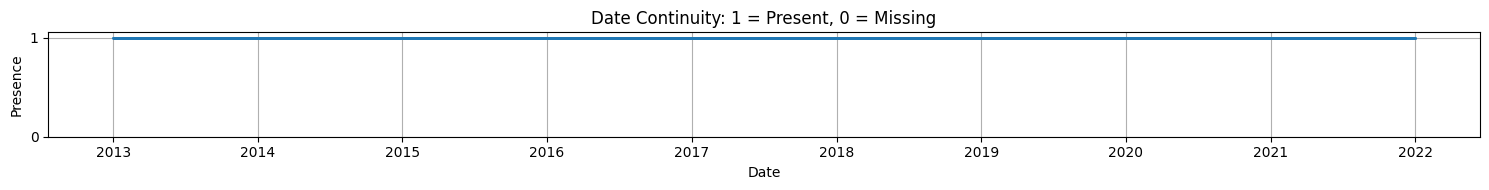

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df_pivot' has 'date' as the index
dates_in_data = df_pivot.index

# Generate a complete date range from the minimum to the maximum date
full_date_range = pd.date_range(start=dates_in_data.min(), end=dates_in_data.max(), freq='D')

# Create a DataFrame indicating presence (1) or absence (0) of each date
date_presence = pd.DataFrame({'Date': full_date_range})
date_presence['Present'] = date_presence['Date'].isin(dates_in_data).astype(int)

# Plotting
plt.figure(figsize=(15, 2))
plt.plot(date_presence['Date'], date_presence['Present'], marker='o', linestyle='-', markersize=
         1, linewidth=1)
plt.title('Date Continuity: 1 = Present, 0 = Missing')
plt.xlabel('Date')
plt.ylabel('Presence')
plt.yticks([0, 1])
plt.grid(True)
plt.tight_layout()
plt.show()

Brands in Aldovia: ['Aldovia-AIMST', 'Aldovia-AITPJ', 'Aldovia-AIZTT', 'Aldovia-AMOKR', 'Aldovia-BELQI', 'Aldovia-BNCPE', 'Aldovia-BQSIJ', 'Aldovia-BRQJC', 'Aldovia-BUMTY', 'Aldovia-CCXTL', 'Aldovia-CDFFX', 'Aldovia-CQSEZ', 'Aldovia-DDRNC', 'Aldovia-DKGUK', 'Aldovia-DKNSS', 'Aldovia-DLOBM', 'Aldovia-DRGNL', 'Aldovia-DXGSD', 'Aldovia-EAHGQ', 'Aldovia-EQZWB', 'Aldovia-ESVUF', 'Aldovia-EUESX', 'Aldovia-EUJWP', 'Aldovia-FIPNP', 'Aldovia-FLGPE', 'Aldovia-FNHPF', 'Aldovia-FUYDW', 'Aldovia-GBWHQ', 'Aldovia-GIKKL', 'Aldovia-GUCEF', 'Aldovia-GYMRM', 'Aldovia-HGSMA', 'Aldovia-HGXNC', 'Aldovia-HHBXR', 'Aldovia-HIBSM', 'Aldovia-HJDCK', 'Aldovia-HOIWJ', 'Aldovia-HPCEJ', 'Aldovia-HZCGL', 'Aldovia-ICPTW', 'Aldovia-IDMBR', 'Aldovia-IKGEA', 'Aldovia-IMUFR', 'Aldovia-IMVCZ', 'Aldovia-IYPIH', 'Aldovia-JAZVP', 'Aldovia-JJVUD', 'Aldovia-JQKXY', 'Aldovia-JTOEV', 'Aldovia-KGUIR', 'Aldovia-KKZMZ', 'Aldovia-KMXBC', 'Aldovia-LCXHV', 'Aldovia-LFJNN', 'Aldovia-LGFTN', 'Aldovia-LIIDH', 'Aldovia-LRHOW', 'Aldovia-LT

C:\Users\adria\AppData\Local\Temp\ipykernel_9564\1430261377.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_pivot.resample('M').mean()
C:\Users\adria\AppData\Local\Temp\ipykernel_9564\1430261377.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly[column] = df_pivot[column].resample('M').mean()


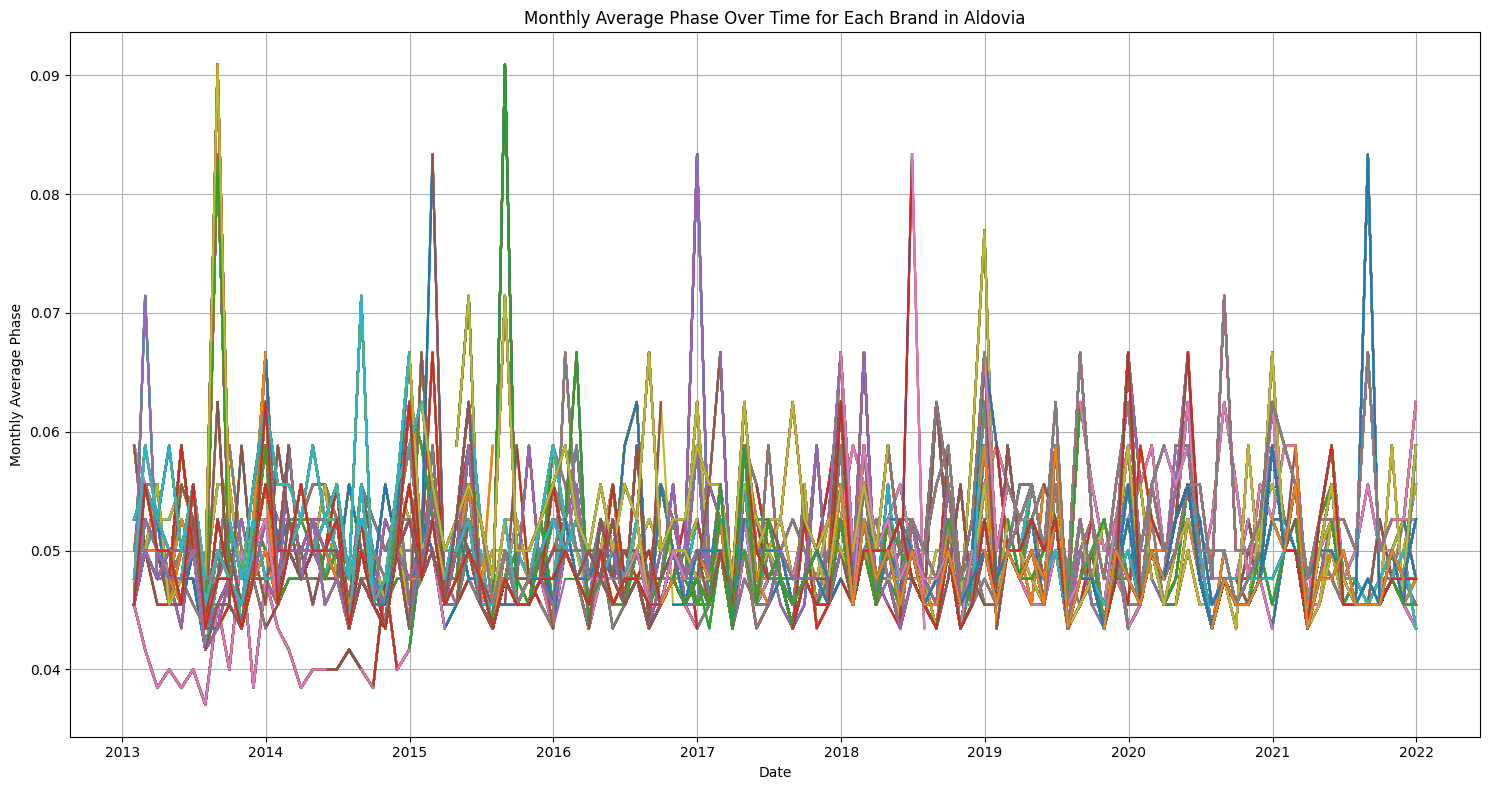

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Assuming df_pivot is already created and contains the full date range as the index

# Plot each brand for a given country
country = 'Aldovia'
pattern = f'^{re.escape(country)}-'
filtered_columns = [col for col in df_pivot.columns if re.match(pattern, col)]
print(f"Brands in {country}:", filtered_columns)

# Resample each column to monthly averages
df_monthly = df_pivot.resample('M').mean()
for column in filtered_columns:
    df_monthly[column] = df_pivot[column].resample('M').mean()

# Plotting
plt.figure(figsize=(15, 8))

for column in df_monthly.columns:
    plt.plot(df_monthly.index, df_monthly[column], label=column)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Monthly Average Phase')
plt.title('Monthly Average Phase Over Time for Each Brand in ' + country)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()